In [120]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Fit-a-polynomial-of-degree-m-to-your-training-data,-letting-$m-=-1,-2,-...$.-A-polynomial-of-degree-$m$-has-the-form-$$-p(x,-\textbf{w})-=-w_0-+-w_1x-+-w_2x^2-+-...-+-w_mx^m-$$Fit-by-minimizing-the-mean-squared-error-$E(W)$-via-differentiating-with-respect-to-$\textbf{w}$-and-solving-the-resulting-linear-equation;-this-will-give-the-optimal-weight-vector,-$w^*-$,-with-minimal-error-$-E(w^*)$." data-toc-modified-id="Fit-a-polynomial-of-degree-m-to-your-training-data,-letting-$m-=-1,-2,-...$.-A-polynomial-of-degree-$m$-has-the-form-$$-p(x,-\textbf{w})-=-w_0-+-w_1x-+-w_2x^2-+-...-+-w_mx^m-$$Fit-by-minimizing-the-mean-squared-error-$E(W)$-via-differentiating-with-respect-to-$\textbf{w}$-and-solving-the-resulting-linear-equation;-this-will-give-the-optimal-weight-vector,-$w^*-$,-with-minimal-error-$-E(w^*)$.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fit a polynomial of degree m to your training data, letting $m = 1, 2, ...$. A polynomial of degree $m$ has the form<br><br> <div class="MathJax_Display" style="text-align: center;"></div><script type="math/tex; mode=display" id="MathJax-Element-126"> p(x, \textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_mx^m </script><br>Fit by minimizing the mean squared error $E(W)$ via differentiating with respect to $\textbf{w}$ and solving the resulting linear equation; this will give the optimal weight vector, $w^* $, with minimal error $ E(w^*)$.</a></span></li><li><span><a href="#Create-a-test-set-of-100-data-points-using-same-procedure-used-to-create-training-data.-Using-optimal-weights-for-$m-=-1,-2,-....,$-compute-the-$\text{root-mean-square-error}$-(RMS)-of-your-optimal-polynomial-on-both-the-training-data-and-test-data;-the-RMS-is-defined-by--$$-RMS-=-\sqrt{2/NE(w^*)}-\text{,}-$$-where-$N$-is-the-size-of-the-data-set.-($N$-will-be-different-for-your-training-and-test-sets.)" data-toc-modified-id="Create-a-test-set-of-100-data-points-using-same-procedure-used-to-create-training-data.-Using-optimal-weights-for-$m-=-1,-2,-....,$-compute-the-$\text{root-mean-square-error}$-(RMS)-of-your-optimal-polynomial-on-both-the-training-data-and-test-data;-the-RMS-is-defined-by--$$-RMS-=-\sqrt{2/NE(w^*)}-\text{,}-$$-where-$N$-is-the-size-of-the-data-set.-($N$-will-be-different-for-your-training-and-test-sets.)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a test set of 100 data points using same procedure used to create training data. Using optimal weights for $m = 1, 2, ....,$ compute the $\text{root-mean-square error}$ (RMS) of your optimal polynomial on both the training data and test data; the RMS is defined by <br><br> <div class="MathJax_Display" style="text-align: center;"></div><script type="math/tex; mode=display" id="MathJax-Element-298"> RMS = \sqrt{2/NE(w^*)} \text{,} </script> where $N$ is the size of the data set. ($N$ will be different for your training and test sets.)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-can-do-this-a-better-way-by-making-a-numpy-predictions-array-and-taking-advantage-of-numpy's-vectorization/broadcasting" data-toc-modified-id="We-can-do-this-a-better-way-by-making-a-numpy-predictions-array-and-taking-advantage-of-numpy's-vectorization/broadcasting-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>We can do this a better way by making a numpy predictions array and taking advantage of numpy's vectorization/broadcasting</a></span></li></ul></li></ul></li><li><span><a href="#Plot-the-RMS-on-training-and-test-as-a-function-of-$m$.-You-should-then-be-able-to-see-the-optimal-value-of-m-for-fitting-your-data;-the-optimal-choice-will-have-a-small-error,-small-$\text{model-complexity}$-(low-degree),-and-decent-$-\text{generalization}-$-(low-test-error)" data-toc-modified-id="Plot-the-RMS-on-training-and-test-as-a-function-of-$m$.-You-should-then-be-able-to-see-the-optimal-value-of-m-for-fitting-your-data;-the-optimal-choice-will-have-a-small-error,-small-$\text{model-complexity}$-(low-degree),-and-decent-$-\text{generalization}-$-(low-test-error)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the RMS on training and test as a function of $m$. You should then be able to see the optimal value of m for fitting your data; the optimal choice will have a small error, small $\text{model complexity}$ (low degree), and decent $ \text{generalization} $ (low test error)</a></span></li></ul></div>

# Fit a polynomial of degree m to your training data, letting $m = 1, 2, ...$. A polynomial of degree $m$ has the form<br><br> $$ p(x, \textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_mx^m $$<br>Fit by minimizing the mean squared error $E(W)$ via differentiating with respect to $\textbf{w}$ and solving the resulting linear equation; this will give the optimal weight vector, $w^* $, with minimal error $ E(w^*)$.


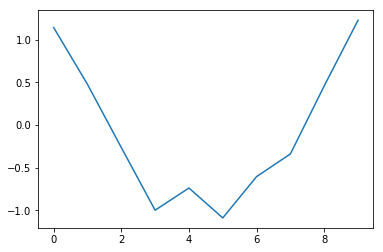

In [121]:
def gen_data_set(size, mu, sigma):
    noise = np.random.normal(loc=mu, scale=sigma, size=size)
    x = .6*np.linspace(1, size, num=size)
    y = np.cos(x) + noise
    plt.plot(y)
    plt.show()
    return [x, y]

mu, sigma = 0, .25
x_train, y_train = gen_data_set(size=10, mu=mu, sigma=sigma)

In [122]:
# Building matrix for left side of nonnormalized equation
# letting m = n  <------- ???
n = len(x_train)
m = n

left_matrix = []
right_matrix = []

extra = 0
for r in range(0, n): # Builds matrix
    left_row = []
    right_row = []
    
    for m_i in range(0+extra, m+extra): # Builds a row 
        left_value = 0
        right_value = 0
        
        for i in range(n): # Gives single element of row 
            left_value += x_train[i] ** m_i 
            
        left_row.append(left_value)
    
    left_matrix.append(left_row)
    extra += 1
    
for m_i in range(0, m): # Builds whole right matrix 
    for i in range(n): # builds only value in row of right matrix
        right_value += x_train[i] ** m_i * y_train[i]
    right_matrix.append([right_value])

left_matrix = np.matrix(left_matrix)
right_matrix = np.matrix(right_matrix)

In [123]:
# Will solve the resulting linear equation with numpy.linalg.solve
w_star = np.linalg.solve(left_matrix, right_matrix)
w_star

matrix([[ -3.60132227e+03],
        [  1.61199953e+04],
        [ -2.87331404e+04],
        [  2.73885331e+04],
        [ -1.56208285e+04],
        [  5.58877669e+03],
        [ -1.26477566e+03],
        [  1.75731331e+02],
        [ -1.36751523e+01],
        [  4.56103345e-01]])

# Create a test set of 100 data points using same procedure used to create training data. Using optimal weights for $m = 1, 2, ....,$ compute the $\text{root-mean-square error}$ (RMS) of your optimal polynomial on both the training data and test data; the RMS is defined by <br><br> $$ RMS = \sqrt{2/NE(w^*)} \text{,} $$ where $N$ is the size of the data set. ($N$ will be different for your training and test sets.)

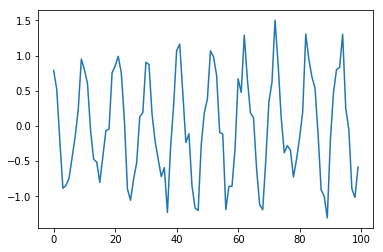

In [124]:
x_test, y_test = gen_data_set(size=100, mu=mu, sigma=sigma)

In [125]:
def p(x_scalar, w):
    return w[0] + sum([x*w[i] for m in range(len(w))])

def ms(x_vec, y, w):
    return .5 * sum([(p(x_vec[i], w) - y[i]) ** 2 for i in range(len(x_vec))])

def rmse(x_vec, y, w):
    return np.sqrt(2/len(x_vec) * ms(x_vec, y, w))

print(rmse(x_train, y_train, w_star))

[[ 3573.88331298]]


### We can do this a better way by making a numpy predictions array and taking advantage of numpy's vectorization/broadcasting

In [142]:
def rmse_better(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

predictions_train = np.array([p(x_train[i], w_star) for i in range(len(x_train))])
predictions_test = np.array([p(x_test[i], w_star) for i in range(len(x_test))])

rmse_train_star = rmse_better(predictions_train, y_train)
rmse_test_star = rmse_better(predictions_test, y_test)
# This is much nicer isn't it :)
print('Minimum error on the training data set:', rmse_train_star)
print('Minimum error on the test data set:', rmse_test_star)

Minimum error on the training data set: 4421.75863289
Minimum error on the test data set: 4421.81711712


# Plot the RMS on training and test as a function of $m$. You should then be able to see the optimal value of m for fitting your data; the optimal choice will have a small error, small $\text{model complexity}$ (low degree), and decent $ \text{generalization} $ (low test error)

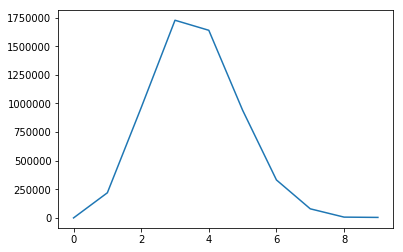

In [145]:
# In order to make RMSE a function of m (the degree of polynomial), we will make weights for 
# the degrees we wish to remove 0

n = len(x_train)
rmses = []
# n === m
for mm in range(0, n):
    w_star_new = np.zeros(n)
    for i in range(0, mm):
        # start from the back
        w_star_new[i] = w_star[i]
        
    rmses.append(rmse(x_train, y_train, w_star_new))

plt.plot(rmses)
plt.show()